In [1]:
import pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import StringType, IntegerType

%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 9999)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

In [3]:
spark = SparkSession.builder.master("local[2]").appName('car_accidents').getOrCreate()

In [4]:
df = spark.read.csv('C:/Users/a842488/OneDrive - Atos/Desktop/Project', inferSchema='True', header=True)
df = df.sample(0.05)

# Data Analysis

In [5]:
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Severity: integer (nullable = true)
 |-- Start_Time: string (nullable = true)
 |-- End_Time: string (nullable = true)
 |-- Start_Lat: double (nullable = true)
 |-- Start_Lng: double (nullable = true)
 |-- End_Lat: double (nullable = true)
 |-- End_Lng: double (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Description: string (nullable = true)
 |-- Number: double (nullable = true)
 |-- Street: string (nullable = true)
 |-- Side: string (nullable = true)
 |-- City: string (nullable = true)
 |-- County: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Zipcode: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Timezone: string (nullable = true)
 |-- Airport_Code: string (nullable = true)
 |-- Weather_Timestamp: string (nullable = true)
 |-- Temperature(F): double (nullable = true)
 |-- Wind_Chill(F): double (nullable = true)
 |-- Humidity(%): double (nullable = true)
 |-- Pressure(in): doub

In [6]:
df.describe().toPandas().head(10)

,summary,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,count,142495,142495,142495,142495,142495,142495,142495,142495,142495,142495,55270,142495,142495,142492,142495,142495,142419,142495,142306,142021,139964,139014,118943,138840,139517,138934,138783,134468,114917,138965,142346,142346,142346,142346
1,mean,None,2.1382855538790833,None,None,36.2360334456157,-97.10611072792011,36.236155324411456,-97.10579501627437,0.7041411417944509,1125.0,8121.684421928713,None,None,None,None,None,59870.184398413396,None,None,None,None,61.73245716258796,59.61574871997509,64.41902189570729,29.47342696588942,9.089912620380899,None,7.404371300235021,0.007270116692917521,None,None,None,None,None
2,stddev,None,0.48020073812248026,None,None,5.365386795811229,18.30476210932638,5.365546717889744,18.304608659107295,1.5585724318162415,0.0,16247.072767325522,None,None,None,None,None,31556.432725316015,None,None,None,None,18.6068864180845,21.163201395388146,22.840547018714318,1.0392169769000053,2.6938335600806353,None,5.784185351935511,0.09936091463126917,None,None,None,None,None
3,min,A-1,1,2016-02-08 00:37:08,2016-02-08 06:37:08,24.574326,-124.49439,24.571260000000002,-124.49439,0.0,1183 1182 1125,1.0,10 Mile Rd,L,Aaronsburg,Abbeville,AL,01008,US,US/Central,K01M,2016-02-08 00:53:00,-26.0,-51.5,1.0,19.76,0.0,CALM,0.0,0.0,Blowing Dust,Day,Day,Day,Day
4,max,A-999997,4,2021-12-31 23:30:00,2021-12-31 23:59:01,49.00058,-67.95926999999999,49.075,-67.882408,138.562,sb 29 jso 11th. 7-062 VEH VS DEER/ REQ 7-55 CONT RESP,851799.0,Zumbehl Rd,R,Zwingle,Yuma,WY,99357,US,US/Pacific,KZZV,2021-12-31 23:53:00,196.0,196.0,100.0,52.76,100.0,West,812.0,10.4,Wintry Mix / Windy,Night,Night,Night,Night


In [7]:
df.limit(5).toPandas().head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.109,-83.093,40.112,-83.032,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentangy Riv Rd/Exit 22 - Accident.,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-39,2,2016-02-09 12:31:08,2016-02-09 18:31:08,40.488,-80.009,40.486,-80.009,0.118,At Venture St/Exit 10 - Accident.,NaN,US-19 Trk S,R,Pittsburgh,Allegheny,PA,15214,US,US/Eastern,KAGC,2016-02-09 12:53:00,28.9,18.2,82.0,29.61,1.0,SW,13.8,0.0,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-52,2,2016-02-10 08:44:31,2016-02-10 14:44:31,39.744,-84.205,39.751,-84.205,0.431,At US-35/Albany St/Exit 52 - Accident.,NaN,I-75 N,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-10 08:47:00,14.0,-2.5,84.0,29.92,3.0,West,17.3,0.0,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3,A-57,2,2016-02-10 09:06:09,2016-02-10 15:06:09,38.178,-85.719,38.181,-85.721,0.223,At KY-61/Grade Lane/Exit 130 - Accident.,NaN,Dr Martin Luther King Jr Expy N,R,Louisville,Jefferson,KY,40213,US,US/Eastern,KSDF,2016-02-10 08:56:00,17.1,5.8,68.0,30.12,10.0,West,9.2,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,A-95,2,2016-02-11 07:47:57,2016-02-11 13:47:57,40.056,-83.031,40.055,-83.032,0.134,At Henderson Rd - Accident.,NaN,Olentangy Fwy S,R,Columbus,Franklin,OH,43214,US,US/Eastern,KOSU,2016-02-11 07:53:00,9.0,-3.2,84.0,30.24,10.0,West,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
# add new columns
df = df.withColumn('hour_of_accident', df.Start_Time.substr(12,2)) \
       .withColumn('date_of_accident', df.Start_Time.substr(1,10))

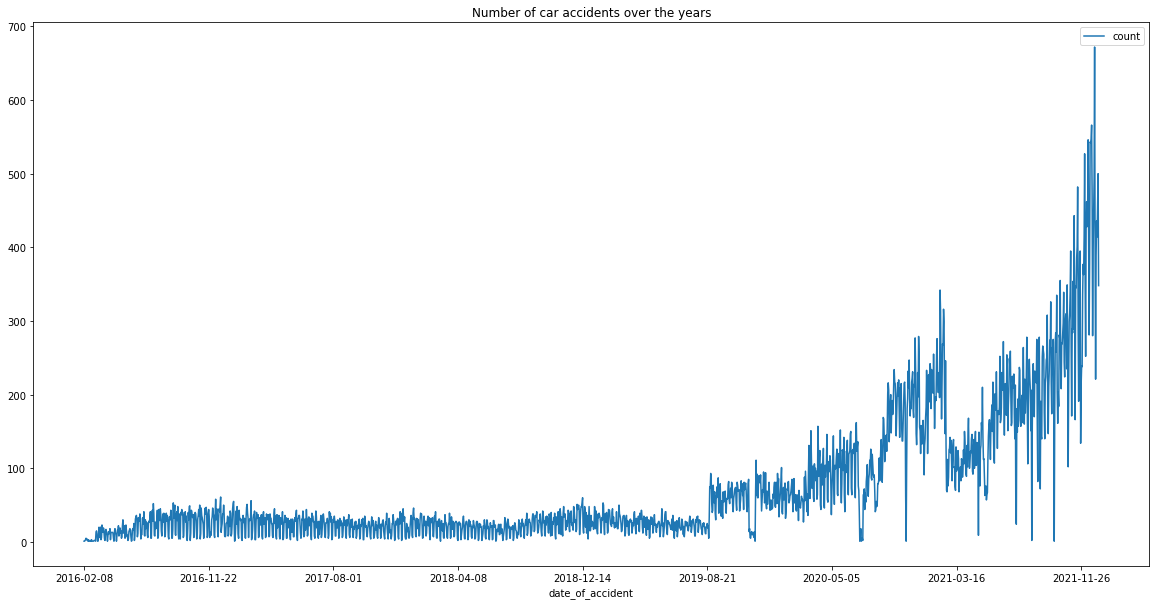

In [9]:
# car accidents over the years
df_date = df.select('date_of_accident').groupBy('date_of_accident').count().orderBy('date_of_accident').toPandas()
df_date_chart = df_date.plot.line(title = 'Number of car accidents over the years', x='date_of_accident', figsize= (20,10))

In [10]:
# create pivot table
distinct_severity = [x.Severity for x in df.select('Severity').distinct().collect()].sort()
df_county= df.groupBy('hour_of_accident').pivot('Severity',distinct_severity).count().orderBy('hour_of_accident')

In [11]:
# pivot the state and hour of accident
df_county = df_county.toPandas().set_index('hour_of_accident')
df_county = df_county.fillna(0)
df_county = df_county.applymap('{:,.0f}'.format)
df_county.head(25)

,1,2,3,4
hour_of_accident,,,,
00,17,"3,054",133,261
01,5,"2,679",104,141
02,12,"2,398",118,169
03,11,"2,054",148,166
04,14,"2,234",130,176
05,32,"3,624",236,245
06,45,"4,984",331,283
07,67,"6,033",433,312
08,58,"5,768",434,312


In [12]:
# top 10 cities with car accidents
# create pivot table
df_city= df.groupBy('City').pivot('Severity',distinct_severity).count()
df_city = df_city.fillna(0) \
                 .withColumn('total', F.col('1') + F.col('2') + F.col('3') + F.col('4')) \
                 .orderBy(F.desc('total')) \
                 .drop('total')

df_city.limit(10).toPandas().set_index('City').head(11)

,1,2,3,4
City,,,,
Miami,2,5166,113,74
Los Angeles,0,3323,111,40
Orlando,18,2576,41,57
Dallas,0,1749,290,51
Houston,0,1617,286,41
Charlotte,21,1566,54,22
Sacramento,28,1485,23,12
San Diego,0,1311,32,16
Minneapolis,0,1035,72,2


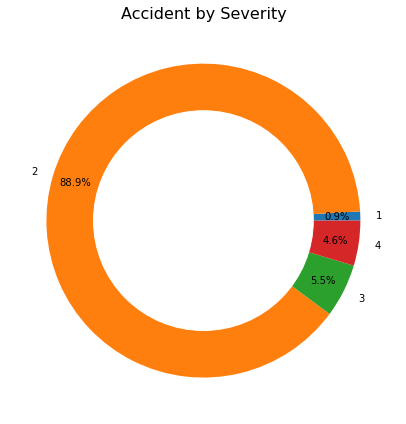

In [13]:
# create visualization of Severity (how many times each category appears in the data set)
df_severity = df.select('ID','Severity').toPandas().groupby('Severity').count()['ID']

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = [1,2,3,4]
plt.pie(df_severity, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident by Severity",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

In [14]:
# create list of numerical and categorical columns 
numerical_cols = df.columns[21:29]
categorical_cols = df.columns[29:47]

In [15]:
# create blank df 
blank_df = spark.range(0).drop("id")
blank_df = blank_df.withColumn('working', F.lit(None).cast(StringType())) \
                   .withColumn('1', F.lit(None).cast(IntegerType())) \
                   .withColumn('2', F.lit(None).cast(IntegerType())) \
                   .withColumn('3', F.lit(None).cast(IntegerType())) \
                   .withColumn('4', F.lit(None).cast(IntegerType())) 


In [16]:
# use blank_df as container for pivoted tables with the view Severity - conditions
for temp in categorical_cols:
    temp_df = df.groupBy(temp).pivot('Severity',distinct_severity).count()
    temp_df = temp_df.withColumn('name', F.lit(temp))
    temp_df = temp_df.withColumn(temp,F.concat(F.col('name'), F.lit(": "), F.col(temp))) \
                     .drop('name') \
                     .withColumnRenamed(temp, 'working')
    blank_df = blank_df.unionAll(temp_df) 

blank_df = blank_df.withColumnRenamed('working', 'Conditions / Severity') \
                   .fillna(0) \
                   .toPandas()

blank_df.head(100)

,Conditions / Severity,1,2,3,4
0,Weather_Condition: Ice Pellets,0,2,0,0
1,Weather_Condition: Shallow Fog,0,44,1,2
2,Weather_Condition: Thunderstorm,0,26,6,9
3,Weather_Condition: Light Snow with Thunder,0,0,1,0
4,Weather_Condition: Light Sleet,0,3,0,0
5,Weather_Condition: Light Snow / Windy,0,115,0,5
6,Weather_Condition: N/A Precipitation,0,58,2,1
7,Weather_Condition: Showers in the Vicinity,1,21,7,2
8,Weather_Condition: Cloudy,161,16190,577,574
9,Weather_Condition: Wintry Mix / Windy,0,1,0,0


In [17]:
# lets drop na
df_test = df.na.drop('any')

for i in categorical_cols:
    df_test = df_test.withColumn(i,F.col(i).cast(StringType()))
    
# drop wind direction col
df_test = df_test.drop('Wind_Direction')
numerical_cols.remove('Wind_Direction')

In [18]:
# use OneHotEncoder to convert categorical columns into vectors
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, VectorIndexer
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

list_of_cols = categorical_cols

stringIndexer = [StringIndexer(inputCol=i, outputCol=i + "_index").fit(df_test) for i in list_of_cols]

encoders = [OneHotEncoder(dropLast=False, inputCol=indexer.getOutputCol(), outputCol="job_vec_"+indexer.getOutputCol()) for indexer in stringIndexer]

list_of_encoders = [encoder.getOutputCol() for encoder in encoders]
list_of_encoders = numerical_cols + list_of_encoders 

vector_assembler = VectorAssembler(inputCols=list_of_encoders, outputCol="features")

pipeline = Pipeline(stages = stringIndexer + encoders + [vector_assembler])
model = pipeline.fit(df_test)
df = model.transform(df_test)

# Create the model - GBT Regression

In [19]:
# create model and split the data
from pyspark.ml.regression import GBTRegressor

va_df = df.select(['features','Severity'])
(train, test) = va_df.randomSplit([0.8, 0.2], seed=123)

gbtr = GBTRegressor(featuresCol='features', labelCol='Severity', maxIter=100)
gbtr = gbtr.fit(train)

In [20]:
# test our model and print indexes
mdata = gbtr.transform(test)
mdata.show(3)
 
rmse=RegressionEvaluator(labelCol="Severity", predictionCol="prediction", metricName="rmse")
rmse=rmse.evaluate(mdata) 
 
mae=RegressionEvaluator(labelCol="Severity", predictionCol="prediction", metricName="mae")
mae=mae.evaluate(mdata) 
 
r2=RegressionEvaluator(labelCol="Severity", predictionCol="prediction", metricName="r2")
r2=r2.evaluate(mdata)

print("RMSE: ", rmse)
print("MAE: ", mae)
print("R-squared: ", r2)

+--------------------+--------+------------------+
|            features|Severity|        prediction|
+--------------------+--------+------------------+
|(98,[0,1,2,3,4,5,...|       2|2.1036943561907075|
|(98,[0,1,2,3,4,5,...|       2|2.0714790632035416|
|(98,[0,1,2,3,4,5,...|       2|2.0249595273005854|
+--------------------+--------+------------------+
only showing top 3 rows

RMSE:  0.3651902194802448
MAE:  0.14323694523570044
R-squared:  0.007913205532588341


In [37]:
# create feature importance
from itertools import chain

attrs = sorted(
    (attr["idx"], attr["name"]) for attr in (chain(*va_df
        .schema["features"]
        .metadata["ml_attr"]["attrs"].values())))

feature_importance = [(name, gbtr.featureImportances[idx])
 for idx, name in attrs
 if gbtr.featureImportances[idx]]

feature_importance_dict = {feature_importance[i][0]:feature_importance[i][1] for i in range(len(feature_importance))}
feature_importance_dict = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for i in range(len(feature_importance_dict)):
    print(f'{feature_importance_dict[i][0]} : {feature_importance_dict[i][1]}')

Pressure(in) : 0.16556317582744673
Wind_Speed(mph) : 0.14526366928541506
Temperature(F) : 0.1439630679505508
Humidity(%) : 0.1311452502759892
Visibility(mi) : 0.07982499548606041
job_vec_Traffic_Signal_index_false : 0.033410158814584534
Wind_Chill(F) : 0.032685589063992666
Precipitation(in) : 0.02437821995026967
job_vec_Crossing_index_false : 0.020827615641455858
job_vec_Weather_Condition_index_Light Rain : 0.016189143701052223
job_vec_Weather_Condition_index_Light Snow : 0.013992388434377905
job_vec_Weather_Condition_index_Smoke : 0.013623454645810364
job_vec_Station_index_false : 0.012033976587804985
job_vec_Stop_index_false : 0.011983050957337244
job_vec_Weather_Condition_index_Overcast : 0.010790200492350452
job_vec_Sunrise_Sunset_index_Day : 0.010576431377803123
job_vec_Railway_index_false : 0.010525336362633479
job_vec_Weather_Condition_index_Snow : 0.009522852205087985
job_vec_Give_Way_index_false : 0.008080989552090204
job_vec_Weather_Condition_index_T-Storm : 0.007738763442918

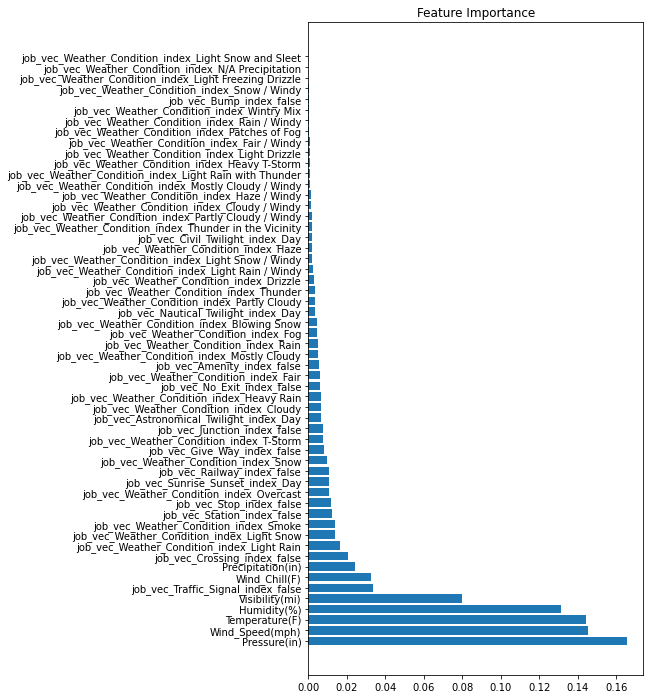

In [44]:
# Create bar chart
plt.figure(figsize=(6, 12))
plt.barh(range(len(feature_importance_dict)), [feature_importance_dict[i][1] for i in range(len(feature_importance_dict))])
# Add feature names as x-axis labels
plt.yticks(range(len(feature_importance)), [feature_importance_dict[i][0] for i in range(len(feature_importance_dict))], fontsize = 10)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

In [22]:
# add new columns that will check if prediction is correct after rounding up the value
mdata = mdata.withColumn('prediction',F.round(F.col('prediction'),0)) \
             .withColumn('check', F.when(F.col('Severity') == F.col('prediction'), 1).otherwise(0))

In [23]:
# create table with % of predicted values
final_view = mdata.select('check').groupBy('check').count() \
                  .withColumn('check', 
                              F.when(F.col('check') == 1, F.regexp_replace(F.col('check'), '1', 'Predicted correctly'))
                              .otherwise('Predicted incorrectly'))

final_view = final_view.withColumn('ratio', F.col('count')/final_view.groupBy().sum().collect()[0][0]) \
                       .toPandas()
final_view.head()

,check,count,ratio
0,Predicted correctly,8886,0.944
1,Predicted incorrectly,529,0.056


<Figure size 12000x8000 with 0 Axes>

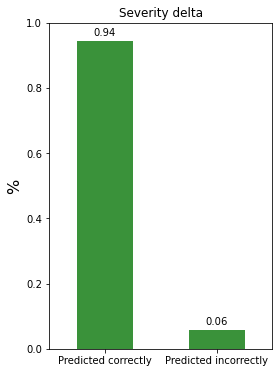

In [24]:
# visualize the data
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.pyplot.figure(dpi=2000) #improve the quality
plt.figure(figsize=(4, 6))
plt.title('Severity delta')
splot=sns.barplot(x="check", y="ratio", color = 'tab:green', data=final_view)
splot.set(xlabel=None)  # remove the axis label
plt.ylim([0, 1])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylabel("%", size=16)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(splot, .5)